# Machine Learning
## **Practical Session 5**: Generative models: the Multivariate Gaussian Model

The goals of this session are:

1.   Review the differences between discriminative and generative models. (concept questions)
2.   Introduce the Gaussian model as a generative model (1-D and multidimensional)
3.   Explore the concept of **Covariance**






### Imports

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Estimation of the mean and the covariance from a dataset

Given a dataset of size $N$ in $D$ dimensions : $\mathbf{X} = (\mathbf{x}^{(1)}, \ldots, \mathbf{x}^{(N)})^\top \in \mathbb{R}^{N\times D}$, the sample mean of the dataset is defined as
$$\hat{\boldsymbol{\mu}} = \frac{1}{N} \sum_{n=1}^N \mathbf{x}^{(n)} \in \mathbb{R}^D$$
The sample covariance matrix of the dataset is defined as :
$$\hat{\Sigma} = \frac{1}{N} \sum_{n=1}^N(\mathbf{x}^{(n)}-\hat{\boldsymbol{\mu}})(\mathbf{x}^{(n)}-\hat{\boldsymbol{\mu}})^\top \in \mathbb{R}^{D\times D}$$

In our setting, each component of our input vector will be consider as a random variable. We can then interpret our dataset as having $N$ realizations of $D$ random variables.

The covariance matrix is a square matrix that contains the covariance between pairs of variables. If we have $D$ variables, the covariance matrix will be an $D\times D$ matrix. The covariance between two variables measures how the two variables vary together *linearly*. If they tend to vary in the same direction, their covariance is positive. If they tend to vary in opposite directions, their covariance is negative. If they are independent (or a linear dependence is not sufficient to capture how the vary together), their covariance is zero (or very small).

The diagonal of the covariance matrix contains the variances of each variable, which measure the degree to which each variable varies on its own. The off-diagonal entries contain the covariances between pairs of variables.

The covariance matrix is important because it provides information about the relationships between variables. For example, it can be used to determine which variables are highly correlated with each other. Variables that are highly correlated can be combined or reduced without losing much information, while variables that are not correlated can be kept separate.

Here we can take a look at an example of a dataset of $N=500$ points generated by a **uniform distribution** in one dimension $D=1$. In that case, the covariance matrix is a scalar.

In [ ]:
X = np.random.rand(500)
mu = X.mean()
Sigma = ((X- mu)**2).sum()/500
print(f'Mean : {mu}\nCovariance:{Sigma}')

Mean : 0.511870129893695
Covariance:0.08897493561119177


We can see the evolution of the sample mean and the sample covariance if we consider more and more points of the dataset :

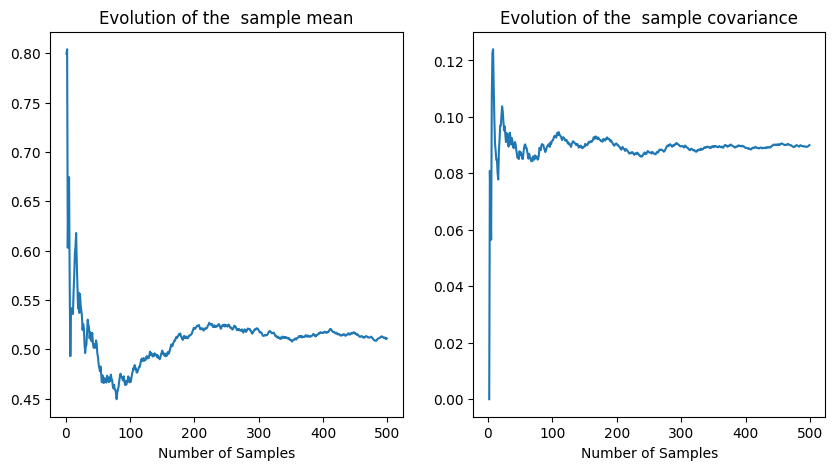

In [ ]:
_, axs = plt.subplots(1,2, figsize=(10,5))
list_means  = [X[:i].mean() for i in range(1,500)]
axs[0].plot(range(1,500), list_means, label = 'Sample Mean')
axs[0].set_title('Evolution of the  sample mean')
axs[0].set_xlabel('Number of Samples')
list_variances = [((X[:i]-X[:i].mean())**2).sum()/ i for i in range(2,500)]
axs[1].plot(range(2,500), list_variances, label = 'Sample Covariance')
axs[1].set_title('Evolution of the  sample covariance')
axs[1].set_xlabel('Number of Samples')
pass

As we can see, the sample mean converges to the true mean as we consider datasets of more and more samples. The same happens with the sample covariance.

Usually we assume that the datapoints are independent identically distributed samples. That is to say, they all randomly drawn independently from each other and also from the same probability distribution. Then, the mean of that distribution is $\mu = \mathbb{E}[x_i]$ and the covariance of that distribution is $\Sigma = \mathbb{E}[(x_i-\mu)(x_i - \mu)^T]$

# About Gaussian Distributions
(Inspired from https://towardsdatascience.com/exploring-normal-distribution-with-jupyter-notebook-3645ec2d83f8)


In statistics, a Gaussian distribution or normal distribution is a type of continuous probability distribution for real-valued random variable.

The probability density function of a 1D Gaussian distribution with mean parameter $\mu$ and variance $\sigma^2$ is
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right)$$
This means that the random variable $X$ which takes continuous values $x$ follows a Gaussian distribution with mean $\mu$ and variance $\sigma^2$

⚠️ The Gaussian distribution is completely determined by its mean $\mu$ and its variance $\sigma^2$. We say that the pair ($\mu$, $\sigma^2$) is a sufficient statistic for the distribution.

The area under the curve equals 1.

$$
\int \limits _{-\infty} ^{+\infty}f(x)dx=1
$$

If a random variable X follows a Gaussian distribution with mean $\mu$ and variance $\sigma^2$(Noted $X\sim\mathcal{N}(\mu,\sigma^2)$). For any interval  $[a, b]$ we have :
$$\mathbb{P}(X\in [a,b]) = \int_a^b \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{1}{2}\left(\frac{s-\mu}{\sigma}\right)^2\right)ds$$
It is hard to overstate the usefulness of Gaussian distribution in statistics and probability, two of their main properties that make them so useful are the following :
    
- **Computability** : A lot of operations are directly computable on Gaussians and they have a lot of good properties for estimation.
- **Universality** : By the central limit theorem (https://en.wikipedia.org/wiki/Central_limit_theorem), for any sequence of identically distributed independent samples (under mild assumptions), the standardized sample mean tends toward a Gaussian distribution. Less formally stated, a sum of enough independant identically distributed variables will look like a Gaussian.

## Probability density function

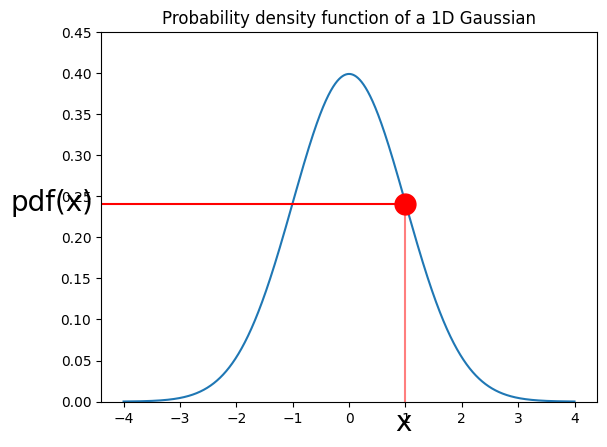

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45) # range
ax.axhline(y=0.24,xmax=0.61,color='r') # horizontal line
ax.axvline(x=1, ymax=0.53, color='r',alpha=0.5) # vertical line
xplot = ax.plot([1], [0.24], marker='o', markersize=15, color="red") # coordinate point
ax.set_xlabel('x',fontsize=20) # set x label
ax.set_ylabel('pdf(x)',fontsize=20,rotation=0) # set y label
ax.xaxis.set_label_coords(0.61, -0.02) # x label coordinate
ax.yaxis.set_label_coords(-0.1, 0.5) # y label coordinate
ax.set_title('Probability density function of a 1D Gaussian')
plt.show()

## Different means and variance

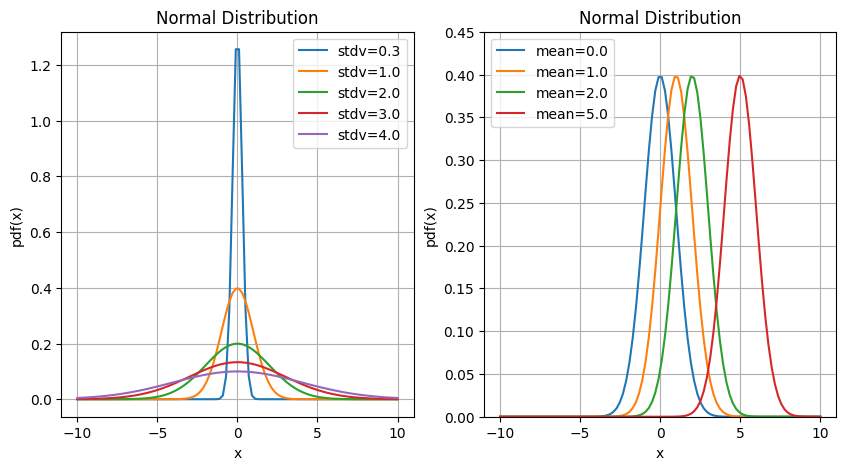

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
ax = axs[0]
x = np.linspace(-10,10,100)
stdvs = [0.3, 1.0, 2.0, 3.0, 4.0]

for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.grid(True)

ax =axs[1]
x = np.linspace(-10,10,100)
means = [0.0, 1.0, 2.0, 5.0]

for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean)

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

### Probability as the area under the curve

$X\sim \mathcal{N}(0,1)$
$$\mathbb{P}\left(X\in [0.5,2]\right) = \int_{0.5}^2 \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}s^2\right)ds$$

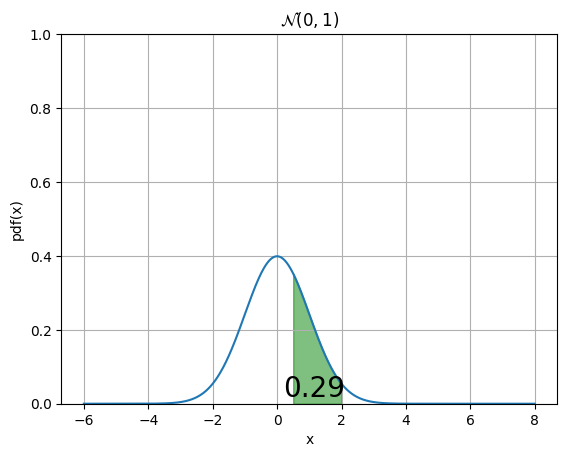

In [ ]:
fig, ax = plt.subplots()

# for distribution curve
x= np.arange(-6,8,0.001)
ax.plot(x, norm.pdf(x,loc=0,scale=1))
ax.set_title("$\mathcal{N}(0,1)$")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)


px=np.arange(0.5,2,0.01)
ax.set_ylim(0,1)
ax.fill_between(px,norm.pdf(px,loc=0,scale=1),alpha=0.5, color='g')

pro=norm(0, 1).cdf(2) - norm(0,1).cdf(0.5)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()


## Gaussian in higher dimensions

In higher dimension, the probability density function of a multivariate Gaussian with mean parameter $\mu \in \mathbb{R}^D$ and covariance matrix $\mathbf{\Sigma} \in \mathbb{R}^{D\times D}$ is
$$f(\mathbf{x}) = (2\pi)^{-D/2}\det (\mathbf{\Sigma})^{-1/2} \, \exp \left( -\frac{1}{2} (\mathbf{x} - \boldsymbol\mu)^{\!\mathsf{T}} \mathbf{\Sigma}^{-1}(\mathbf{x} - \boldsymbol\mu) \right)$$

Text(0.5, 1.0, 'pdf')

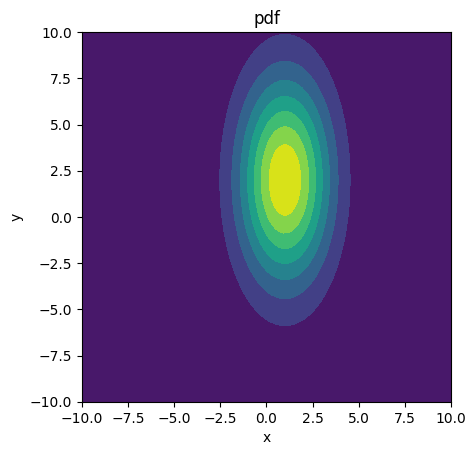

In [ ]:
from scipy.stats import multivariate_normal

x,y = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
pos = np.dstack((x,y))
mean = np.array([1, 2])
cov  = np.array([[3,0],[0,15]])
rv = multivariate_normal(mean,cov)
z = rv.pdf(pos)

fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
ax.contourf(x,y,z)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('pdf')

⚠️ In higher dimension, the Gaussian distribution is completely determined by its mean $\boldsymbol{\mu}$ and its covariance matrix $\mathbf{\Sigma}$. The pair ($\boldsymbol{\mu}$, $\mathbf{\Sigma}$) is again a sufficient statistic.

## Gaussian Distributions as Generative Models

So far, the models we have seen in the course were *discriminative models*.

A discriminative model learns the conditional probability distribution of the output labels given the input data. In other words, it models the decision boundary that separates the input data into different classes. Discriminative models are used for tasks such as classification, regression, and anomaly detection.

In particular, once the discriminative model is learned, we can use it to classify/predict on a new datapoint.

On the other hand, *generative models* learn the distribution of the data.

Once they are trained, they can be used to generate new datapoints that will look similar to the training data. For instance, this is what is used in tasks such as image generation, text generation like chatGPT, or speech synthesis.

**Data vs Model**: Given a dataset $\mathcal{D}$, we can fit a Gaussian model to the dataset. Once we do that, our model can be used to sample new points. *If the Gaussian distribution is a good model of the underlying process that generated the dataset* $\mathcal{D}$, then the new datapoints generated by the Gaussian model will look similar to the training data.

## Maximum Likelihood Estimation

Maximum likelihood estimation (MLE) is a statistical method used to estimate the parameters of a probability distribution based on a set of observed data. The goal of MLE is to find the parameter values that make the observed data most probable, assuming a specific probability distribution.

To apply MLE, one needs to first define a probability distribution that can explain the observed data. For example, if the data appears to be normally distributed, then one can assume that the data follows a normal distribution with unknown mean and variance. Then, the goal is to find the parameter values of this normal distribution that best fit the observed data.

$$\hat{\boldsymbol{\mu}}, \hat{\Sigma} = \text{arg}\max_{\mu,\Sigma}\prod_{n=1}^N p(\mathbf{x}_i|\boldsymbol{\mu},\Sigma)$$

where $p$ is the Gaussian density function with parameters $\boldsymbol{\mu}$, $\Sigma$, that is $p(\mathbf{x}_i|\boldsymbol{\mu},\boldsymbol{\Sigma}) = f(\mathbf{x}_i)$.

We can make different assumptions on the covariance matrix, in order of increasing complexity:
- **Isotropic** : The covariance matrix is diagonal with a constant value along the diagonal $\Sigma=\sigma^2 I_D$ (the matrix $I_D$ denotes the identity matrix in $D$ dimensions). This will work well if the data is isotropic.
- **Diagonal** : The covariance matrix is a diagonal matrix $\Sigma = \text{diag}(\sigma_d^2)$, allowing for different values in the diagonal , this will work well if the different coordinates are not correlated.
- **Full** : No assumption on the covariance matrix, this will work well if the data is a generic Gaussian.


It can be shown that the MLE for a Gaussian is given by the sample mean and the sample covariance :

$$\hat{\boldsymbol{\mu}} = \frac{1}{N} \sum_{n=1}^N \mathbf{x}^{(n)} \in \mathbb{R}^D.$$
For an **Isotropic** Covariance Matrix :
$$\hat{\Sigma} =  \left(\frac{1}{ND}\sum_{n=1}^N||\mathbf{x}^{(n)}-\hat{\boldsymbol{\mu}}||^2\right) \cdot I_D$$
For a **Diagonal** Covariance Matrix :
$$\hat{\Sigma}_{i,i} = \frac{1}{N} \sum_{n=1}^N (x^{(n)}_i - \hat{\mu}_i)^2, \quad \hat{\Sigma}_{i,j}=0, \text{for $i\neq j$}$$
For a **Full** Covariance Matrix :
$$\hat{\Sigma} = \frac{1}{N} \sum_{n=1}^n(\mathbf{x}^{(n)}-\hat{\boldsymbol{\mu}})(\mathbf{x}^{(n)}-\hat{\boldsymbol{\mu}})^\top \in \mathbb{R}^{D\times D}$$

Q : How many parameters do we need to estimate the covariance matrix for each of those models?

A : The isotropic has $1$ parameter, the diagonal has $D$ parameters, and the full covariance matrix has $D + \displaystyle\frac{D(D-1)}{2}$.

In [ ]:
# TODO Code a function MLE that returns the maximum likelihood estimator of a Gaussian model on a dataset given an assumption on the covariance matrix
def MLE(X, covariance_type='Full'):
    '''
    Return the maximum likelihood estimator of a Gaussian model on a dataset X.

    Parameters:
    -----------
    X: np.ndarray, shape(num_samples, num_features)
    The training data matrix, where each row is an input vector and each column is a feature

    covariance_type: string
    Assumption on the covariance matrix, can be "Isotropic", "Diagonal", "Full"

    Returns:
    --------
    mu : np.ndarray, shape(num_features)
        The sample mean of the dataset

    sigma : np.ndarray, shape(num_features,num_features)
        The sample covariance matrix of the dataset
    '''
    assert covariance_type in ['Isotropic','Diagonal','Full'], "The covariance type should be either 'Isotropic', 'Diagonal' or 'Full'"
    mu = X.mean(axis=0, keepdims=True)
    if covariance_type =='Isotropic':
        sigma = ((X - mu)**2).mean() * np.eye(X.shape[1])
    elif covariance_type =='Diagonal':
        sigma = np.diag(((X- mu)**2).mean(axis=0))
    elif covariance_type =='Full':
        sigma = ((X-mu).transpose() @ (X-mu))/(X.shape[0])
    "The covariance type should be either 'Isotropic', 'Diagonal' or 'Full'"
    return mu.reshape(-1), sigma

In [ ]:
X = np.random.rand(500,2)

In [ ]:
# TODO Code a function sample_from_gaussian that draws new sample from a given Gaussian distribution
def sample_from_Gaussian(mu, sigma, N=10):
    '''
    Sample n datapoints from a Gaussian distribution with mean mu and covariance matrix sigma
    '''
    return np.random.multivariate_normal(mean=mu, cov=sigma, size=N)

In [ ]:
# You are given the 6 following datasets X1, X2, X3, X4, X5, X6
G1 = np.random.randn(500)
G2 = np.random.randn(500)
X1 = np.column_stack([G1+5,G2-3])
X2 = np.column_stack([G1, 4*G2+3])
X3 = np.column_stack([3*G1-5, G1+G2+3])
X4 = np.vstack([X1, X3])
X5 = np.random.binomial(10, 0.4, (500,2))/10
X6 = np.random.binomial(10000, 0.4, (500,2))/100

For each of those datasets, do the following :

1.   Plot the dataset
2.   Choose an assumption on the covariance matrix and find the maximum likelihood estimator
3.   Generate 100 more points using the parameters of the maximum likelihood estimator
4.   Plot the original dataset, the new points and the mean of the MLE(in a different color)
5.   Describe qualitatively the result

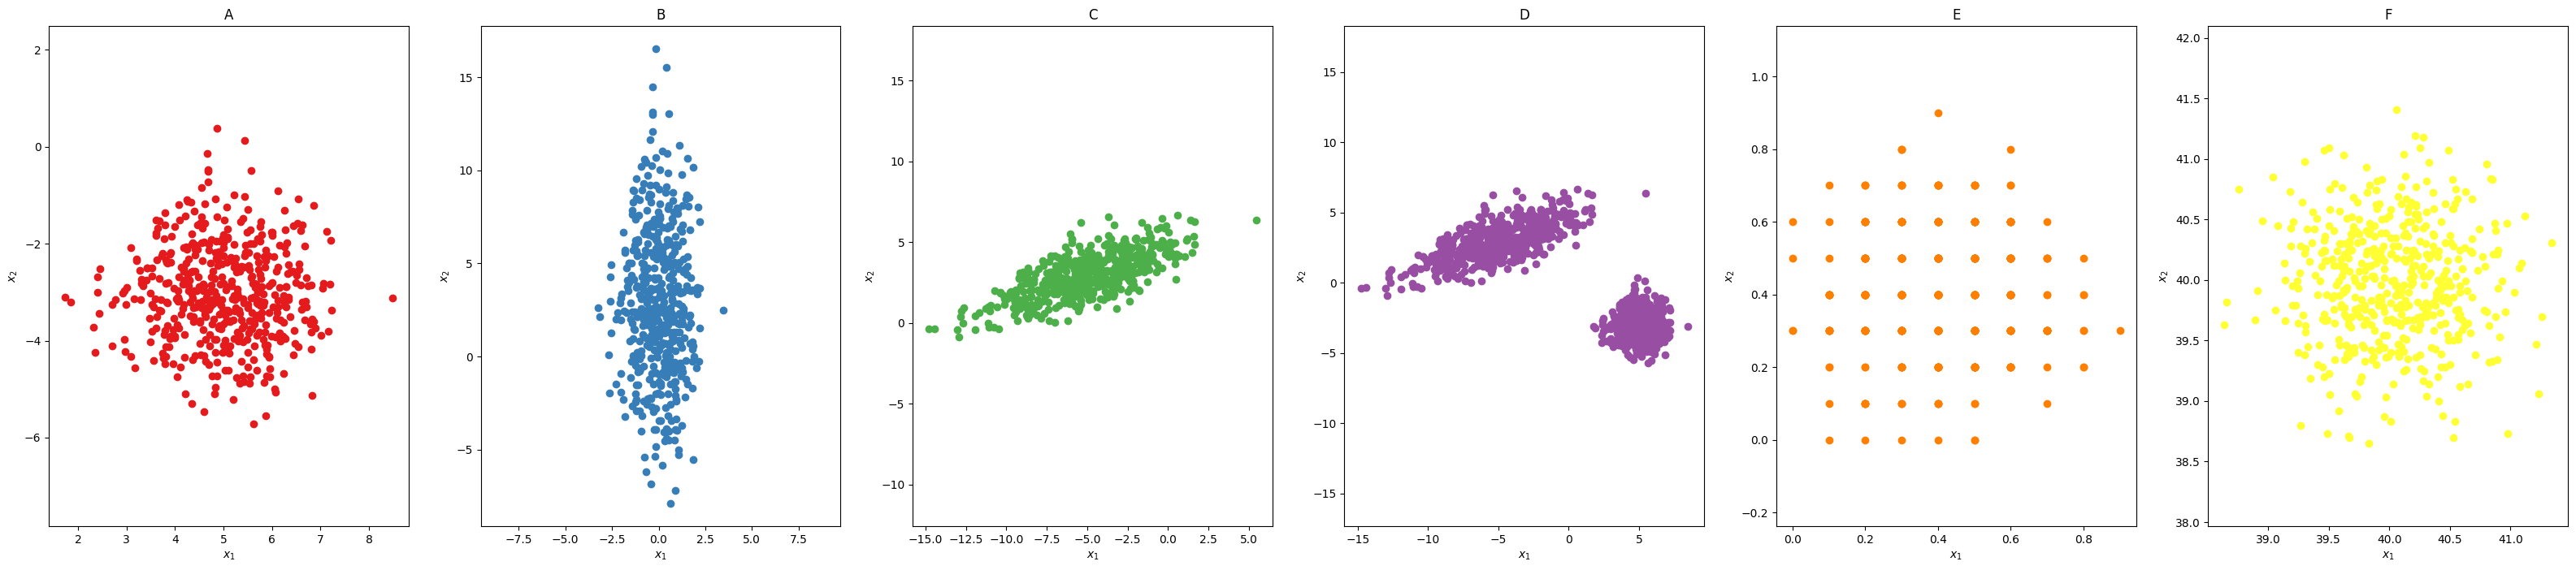

In [ ]:
# YOUR CODE HERE
_, axs = plt.subplots(1,6, figsize=(40,8))
for i, X, name, ax, in zip(range(6), [X1,X2,X3,X4,X5,X6],['A','B','C','D','E','F'], axs):
    ax.scatter(X[:,0], X[:,1],color=plt.cm.Set1(i))
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.axis('equal')
    ax.set_title(name)

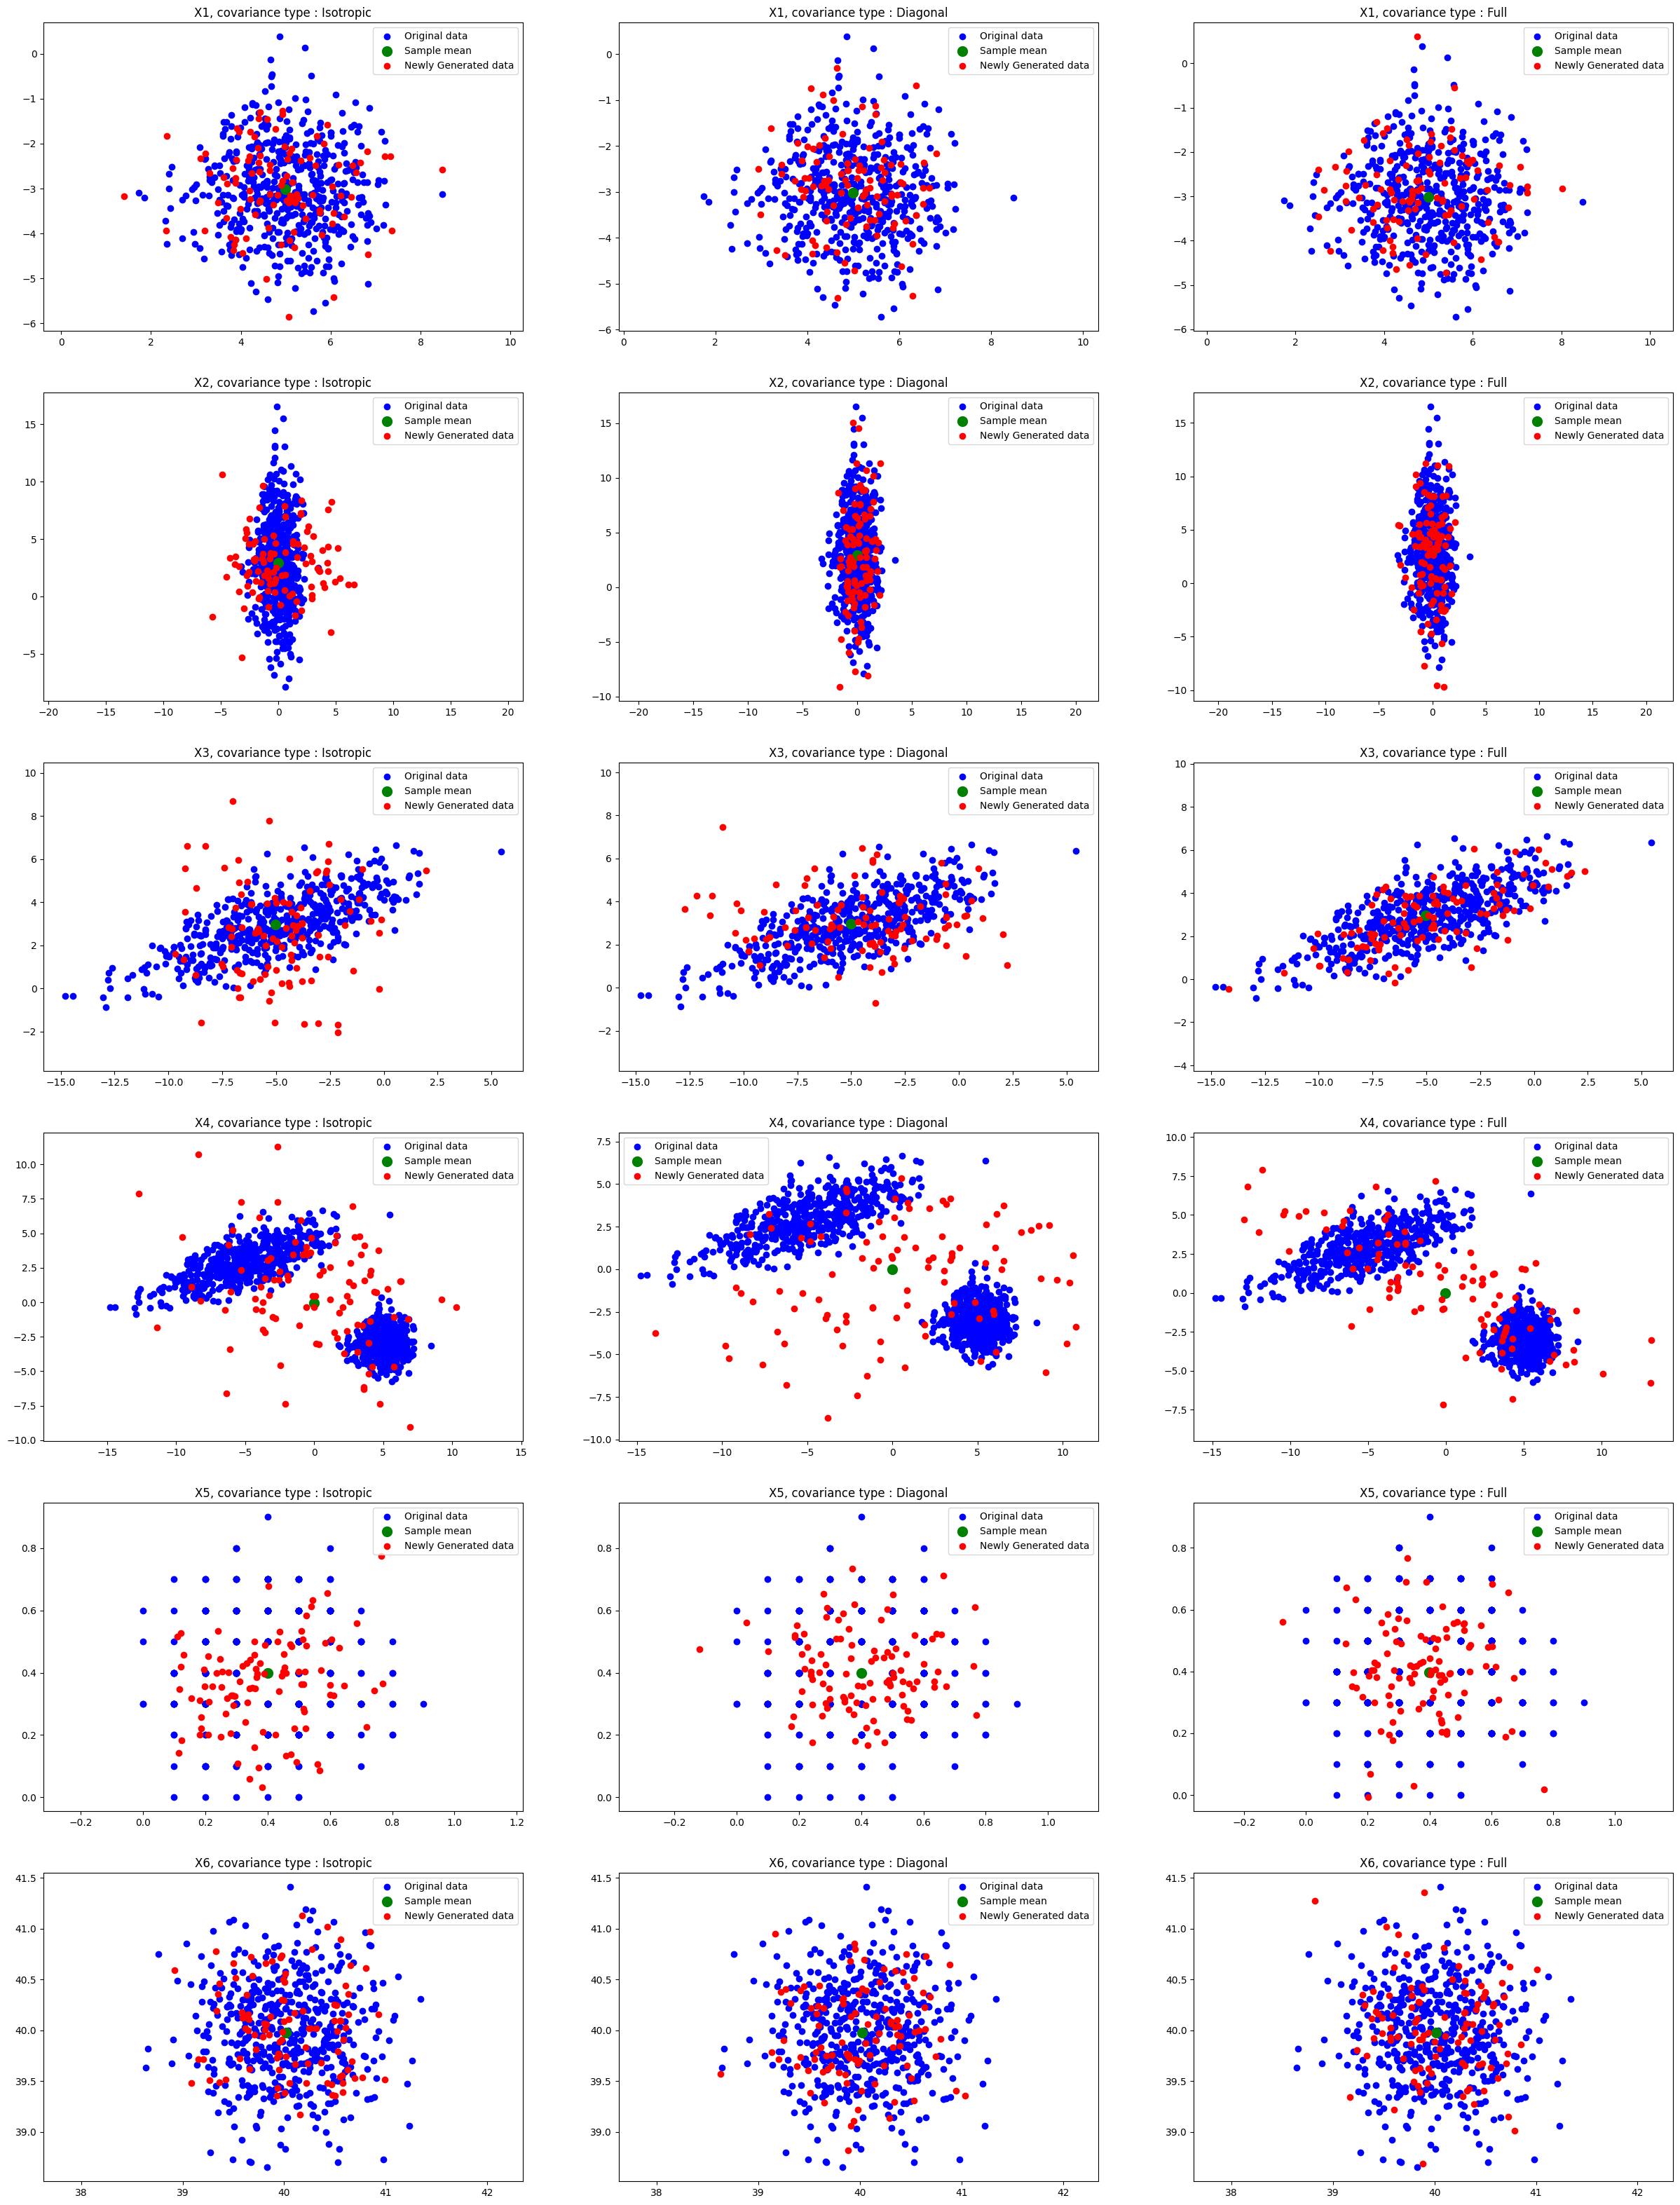

In [ ]:
_, axs = plt.subplots(6,3, figsize=(30,40))
for i, X, name, ax, in zip(range(6), [X1,X2,X3,X4,X5,X6],['X1','X2','X3','X4','X5','X6'], axs):
    for j, covariance_type in enumerate(['Isotropic', 'Diagonal', 'Full']):
        # Plot dataset
        ax[j].scatter(X[:,0], X[:,1] ,color='blue', label='Original data')
        # Compute MLE
        mu,sigma = MLE(X, covariance_type=covariance_type)
        ax[j].scatter(mu[0],mu[1],s=100, color='green', label='Sample mean',)
        new_data = sample_from_Gaussian(mu, sigma, N=100)
        ax[j].scatter(new_data[:,0],new_data[:,1] , color='red', label='Newly Generated data')
        ax[j].axis('equal')
        ax[j].legend()
        ax[j].set_title(f'{name}, covariance type : {covariance_type}')

We have the following observations :
- X1 : All covariance types correctly capture the data. The data is indeed isotropic.
- X2 : The Isotropic model fails to capture the scale difference in the two axis. The diagonal and full model give satisfying results.
- X3 : The Diagonal model fails to capture the correlation between the two coordinates, the full model gives satisfying results.
- X4 : The data is bimodal and cannot be captured by a single Gaussian distribution, we would need to use a mixture of Gaussian (as we will see in future lectures).
- X5 : The data comes from a discrete distribution and it cannot be modeled in a reasonable way by a Gaussian distribution.
- X6 : While the data is not exactly Gaussian, it can be modeled in a reasonable way by a Gaussian distribution.

## Spectral Decomposition

A real-valued symmetric matrix $\Sigma$ of size $D\times D$ can be diagonalized :
$$\Sigma = V\Lambda V^\top$$
where  :
- $V$ is an orthogonal matrix $$VV^\top = I$$
- $\Lambda$ is a diagonal matrix

This means that if we use the eigenvectors $V$ as a basis, the matrix $\Sigma$ can be decomposed into a diagonal matrix.

This is useful to compute operations on the covariance matrix. In particular, we can easily compute the squared Mahalanobis distance using that decomposition:
$$\Delta^2 = (\mathbf{x}-\boldsymbol{\mu})^\top\Sigma^{-1}(\mathbf{x}-\boldsymbol{\mu})$$

In $2$ dimensions, this defines an ellipse with the axis determined by the eigenvectors.

**TODO** : Generate $N=10^3$ points following a normal distribution with mean and covariance :
$$ \mu =\left[\begin{matrix} 3\\3\end{matrix}\right],\quad \Sigma = \left[\begin{matrix} 10 & -4 \\ -4 & 10 \end{matrix}\right]$$

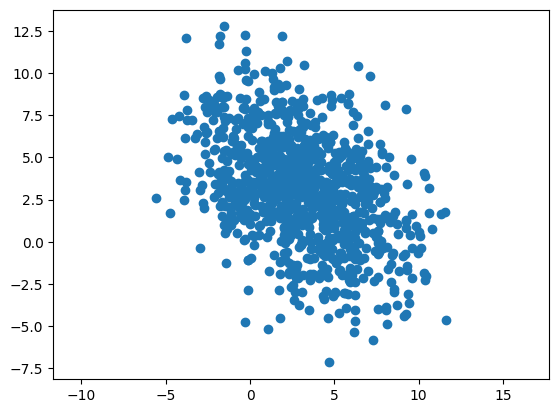

In [ ]:
# TODO : Draw the resulting dataset
mu = np.array([3,3])
sigma = np.array([[10,-4],[-4,10]])
X = sample_from_Gaussian(mu, sigma, 1000)
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')
pass

In [ ]:
# TODO : Compute the Maximum Likelihood estimator of the dataset, compare it with the original parameters of the distribution.
mu_MLE, sigma_MLE = MLE(X)
print(mu_MLE)
print(sigma_MLE)

[3.04359629 3.08726852]
[[ 9.72291245 -4.10070867]
 [-4.10070867 10.10650038]]


The estimation is quite close to the true value.

**TODO** : Compute the eigendecomposition of the estimated covariance matrix $\hat{\Sigma}$

In [ ]:
w, v = np.linalg.eig(sigma_MLE)
print(w)
print(v)

[ 5.809515   14.01989782]
[[-0.7234362   0.69039124]
 [-0.69039124 -0.7234362 ]]


Q : What are the coordinates of the vector [0,1] in the basis formed by the eigenvectors of $\hat{\Sigma}$ ?

In [ ]:
print(np.linalg.inv(v) @ np.array([0,1]))

[-0.69039124 -0.7234362 ]


In [ ]:
print(v.T @ np.array([0,1]))

[-0.69039124 -0.7234362 ]


**TODO** : Translate the dataset to give it mean 0, then, perform a change of basis and plot the dataset in the basis given by the eigenvectors of $\Sigma$

In [ ]:
X_nb = np.einsum('ij,kj->ki',np.linalg.inv(v), X-X.mean(axis=0,keepdims=True))
# More understandable but also more slow
# X_nb = np.stack([(np.linalg.inv(v) @ (X[i]-mu_MLE)) for i in range(X.shape[0])])

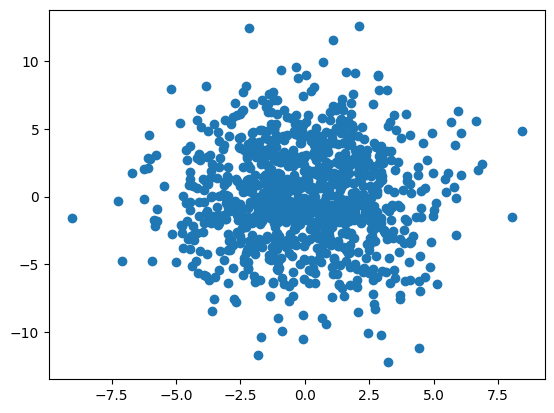

In [ ]:
plt.scatter(X_nb[:,0], X_nb[:,1])

**TODO** : Now scale each coordinate by the root of the corresponding eigenvalue and plot the resulting dataset.

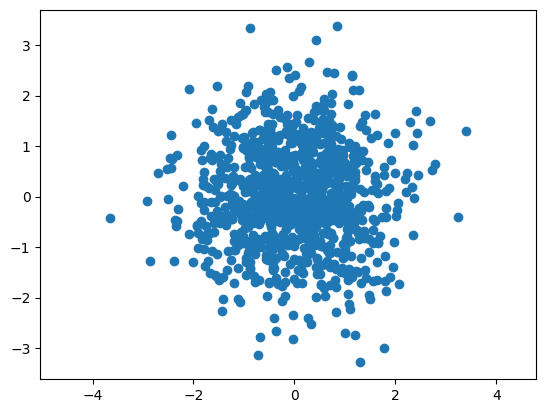

In [ ]:
X_nb_scaled = X_nb/np.sqrt(w)
plt.scatter(X_nb_scaled[:,0],X_nb_scaled[:,1])
plt.axis('equal')
pass

In [ ]:
print(MLE(X_nb_scaled))

(array([-1.36302081e-15, -7.65165709e-16]), array([[ 1.00000000e+00, -1.54209978e-16],
       [-1.54209978e-16,  1.00000000e+00]]))


In [ ]:
# Your Code here

Q : What is the ellipse corresponding to $\Delta^2 = 1$ in this basis? Plot it.

A : It is simply a circle of radius 1 centered in [0,0]

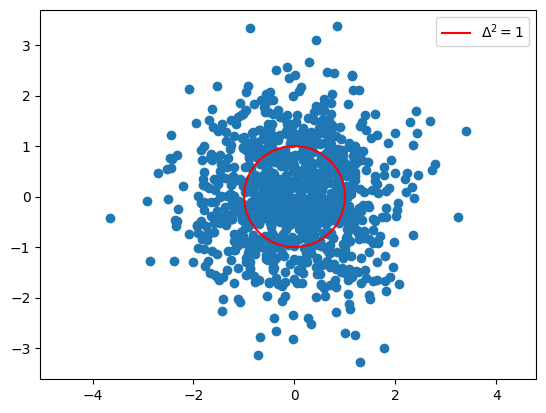

In [ ]:
X_nb_scaled = X_nb/np.sqrt(w)
plt.scatter(X_nb_scaled[:,0],X_nb_scaled[:,1])
plt.axis('equal')
t = np.linspace(0, 2*np.pi)
x = np.cos(t)
y = np.sin(t)
plt.plot(x,y,color='red',label='$\Delta^2=1$')
plt.legend()
pass

In [ ]:
# TODO : Plot the ellipse corresponding to $\Delta^2 = k$ for k = 1,2,3 along with the dataset in the original coordinates. Draw the eigenvectors scaled by the root of the eigenvalues.

Hint : You can draw it in the basis given by the eigenvectors and then perform a change of basis

Hint : You can use the quiver function to plot vectors. In order to get the right scaling, you can use the following arguments : `angles='xy', scale_units='xy', scale=1`

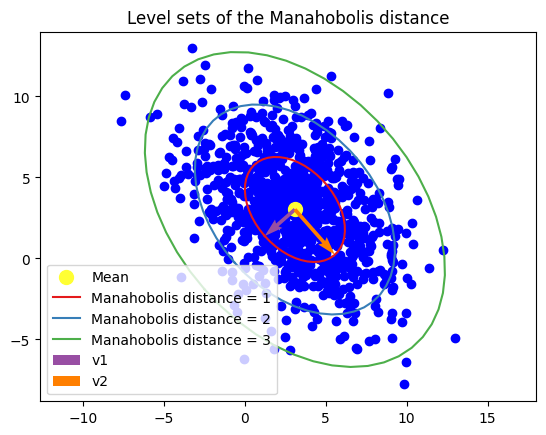

In [ ]:
# Plot the dataset
plt.scatter(X[:,0], X[:,1],color='blue')
# Plot the mean
plt.scatter(mu_MLE[0], mu_MLE[1], color=plt.cm.Set1(5), s=100, label='Mean')
for i, k in enumerate([1, 2, 3]):
    # Create a circle of radius k^2
    t = np.linspace(0, 2*np.pi)
    x = np.cos(t)
    y = np.sin(t)
    circle = np.column_stack([x,y])*k
    plt.axis('equal')
    # Scale it by the eigenvalues
    ellipse_nb = np.sqrt(w).reshape(1,-1) * circle
    # Compute its coordinates in the original basis and translate by the mean
    ellipse = np.einsum('ij,kj->ki', v, ellipse_nb) + mu_MLE.reshape(1,-1)
    plt.plot(ellipse[:,0], ellipse[:,1], color=plt.cm.Set1(i), label=f'Mahalanobis distance = {k}')
# Draw the eigenvectors
plt.quiver(*mu_MLE,*(v[:,0]*np.sqrt(w[0])), color=plt.cm.Set1(3), label='v1', angles='xy', scale_units='xy', scale=1)
plt.quiver(*mu_MLE,*(v[:,1])*np.sqrt(w[1]), color=plt.cm.Set1(4), label='v2', angles='xy', scale_units='xy', scale=1)
plt.legend()
plt.title('Level sets of the Mahalanobis distance')
pass